In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import array
import scipy as sp
import scipy.interpolate
import re
import pickle as pickle
from matplotlib.pyplot import figure

 

In [2]:
with open('color_data0_cul_integral_high_neutral_fraction.pkl', 'rb') as f:
    colors = pickle.load(f)
with open('color_data1_cul_integral_high_neutral_fraction.pkl', 'rb') as f:
    colors_1 = pickle.load(f)

In [3]:
lymans = []
for i in colors:
    lymans.append([i[0][0][-1],i[1]])
for i in colors_1:
    lymans.append([i[0][0][-1],i[1]])

In [4]:
lymans[0]

[7.283794127650621e+18, 1]

In [5]:
lyman_limited_value = []
for i in lymans:
    if(i[1] == 2):
                lyman_limited_value.append(i[0])
lyman_limited_value_sorted = sorted(lyman_limited_value)

In [6]:
lyman_limited_value_sorted[-20:]

[1.6350336696133976e+20,
 1.6392885303301174e+20,
 1.6453093649345243e+20,
 1.7472085323632987e+20,
 1.8241396543692548e+20,
 1.8986253720718334e+20,
 1.9182873637075203e+20,
 2.0558675326290195e+20,
 2.0718665146845718e+20,
 2.2732663114977467e+20,
 2.4120338559052055e+20,
 2.4908120675896466e+20,
 2.8535590713654932e+20,
 2.861513599669268e+20,
 3.010632319574906e+20,
 3.9153887171343804e+20,
 3.93954326409932e+20,
 3.9652139477186065e+20,
 4.178814437312331e+20,
 4.8167528962815564e+20]

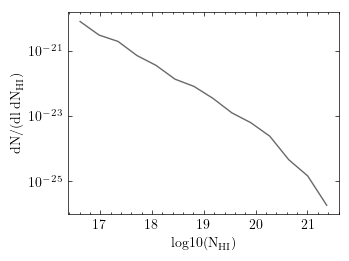

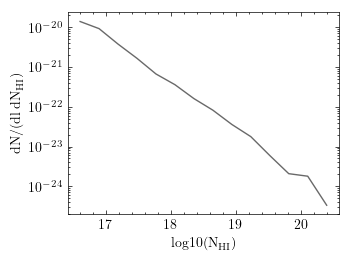

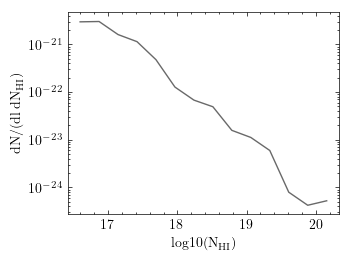

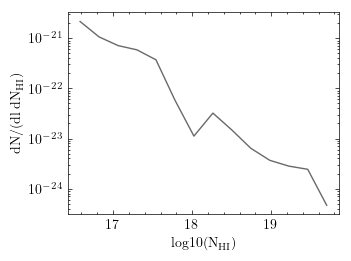

In [7]:
totals_x = []
totals_y = []
for z in range(1,5):
    lyman_limited_value = []
    for i in lymans:
        if(i[1] == z):
            lyman_limited_value.append(i[0])
    lyman_limited_value_sorted = sorted(lyman_limited_value)
    min_value_lyman_limited_value = np.log10(min(lyman_limited_value_sorted))
    max_value_lyman_limited_value = np.log10(max(lyman_limited_value_sorted))
    bins = np.linspace(min_value_lyman_limited_value,max_value_lyman_limited_value,16)
    bin_data = pd.DataFrame()
    bin_data['cut_lyman_limited'] = np.array(lyman_limited_value_sorted)
    bin_data['cut_lyman_limited'] = pd.cut(np.log10(bin_data['cut_lyman_limited']), bins = bins,include_lowest = True).astype(str)
    number_count = []
    for i in range(1, len(bins)):
        number_count.append(0)
        for k in range(0,len(lyman_limited_value_sorted)):
            if(np.log10(lyman_limited_value_sorted[k]) < bins[i]):
                number_count[i-1] += 1

    number_count2 = []
    for i in range(1,len(number_count)):
        number_count2.append(number_count[i] - number_count[i-1])

    d_N_column= []
    for i in range(1,15):
        d_N_column.append(10**bins[i]-10**bins[i-1])
    dl = (200*1000)
    
    y_value = []
    for i,k in zip(number_count2,d_N_column):
        y_value.append(i/(dl*(k)))
    totals_y.append(y_value)    
    x_value = []
    for i in range(1,15):
        x_value.append(bins[i])
    totals_x.append(x_value)
    with plt.style.context('science','notebook'):
        plt.figure()    
        plt.plot(x_value,y_value,color = "dimgray")
        plt.rcParams['font.size'] = 8
        plt.yscale("log") 
        plt.yticks()
        plt.xlabel("$\mathrm{log10(N_{HI})}$",fontsize = 10)
        plt.ylabel("$\mathrm{dN/(dl\: dN_{HI})}$",fontsize =10,)

In [8]:
totals_x[1]

[16.596095081856,
 16.887999316522837,
 17.17990355118968,
 17.471807785856516,
 17.763712020523354,
 18.05561625519019,
 18.34752048985703,
 18.63942472452387,
 18.931328959190708,
 19.223233193857546,
 19.515137428524383,
 19.80704166319122,
 20.098945897858062,
 20.3908501325249]

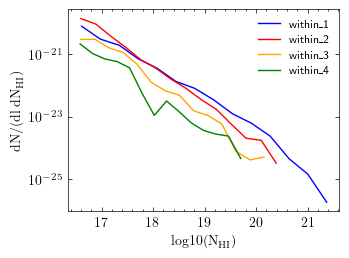

In [9]:
with plt.style.context('science','notebook'):
    plt.figure()    
    plt.plot(totals_x[0],totals_y[0],color = "blue",label="within_1")
    plt.plot(totals_x[1],totals_y[1],color = "red",label="within_2")
    plt.plot(totals_x[2],totals_y[2],color = "orange",label="within_3")
    plt.plot(totals_x[3],totals_y[3],color = "green",label= "within_4")
    plt.rcParams['font.size'] = 8
    plt.yscale("log") 
    plt.yticks()
    plt.xlabel("$\mathrm{log10(N_{HI})}$",fontsize = 10)
    plt.ylabel("$\mathrm{dN/(dl\: dN_{HI})}$",fontsize =10,)
    plt.savefig("f1.pdf")
    plt.legend()

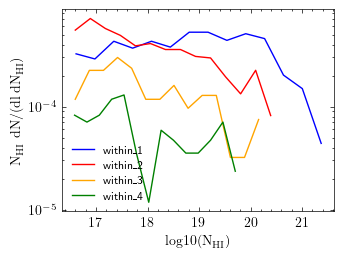

In [10]:

totals_y_2 = (np.multiply(np.power(10,totals_x),totals_y))

with plt.style.context('science','notebook'):
    plt.figure()    
    plt.plot(totals_x[0],totals_y_2[0],color = "blue",label="within_1")
    plt.plot(totals_x[1],totals_y_2[1],color = "red",label="within_2")
    plt.plot(totals_x[2],totals_y_2[2],color = "orange",label="within_3")
    plt.plot(totals_x[3],totals_y_2[3],color = "green",label= "within_4")
    plt.rcParams['font.size'] = 8
    plt.yscale("log") 
    plt.yticks()
    plt.xlabel("$\mathrm{log10(N_{HI})}$",fontsize = 10)
    plt.ylabel("$\mathrm{N_{HI}}$ $\mathrm{dN/(dl\: dN_{HI})}$",fontsize =10,)
    plt.savefig("f1_overplotting.pdf")
    plt.legend()